In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import NearestNeighbors

In [2]:
df = pd.read_csv('C:/All Programming/Udamy Ml course/Machine Learning/dataset/mall.csv')

x = df.iloc[:, [3,4]].values

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

- Method to find optimal eps

In [3]:
def find_optimal_eps(x, k=4):
    neighbors = NearestNeighbors(n_neighbors=k)
    neighbors.fit(x)
    distances, indices = neighbors.kneighbors(x)
    distances = np.sort(distances[:, k-1], axis=0)
    return distances

k_distances = find_optimal_eps(x_scaled, k=4)

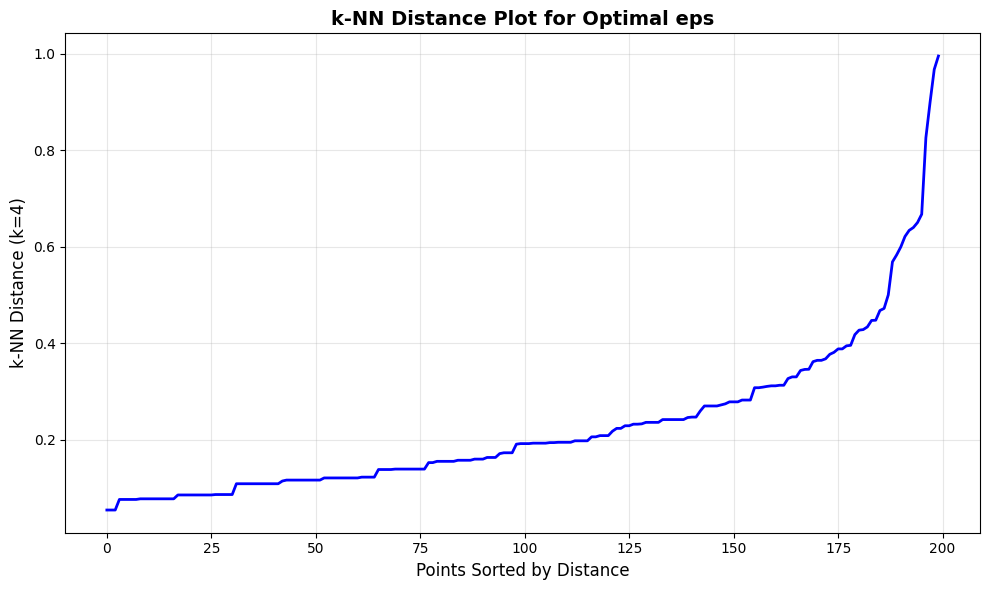

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(k_distances)), k_distances, 'b-', linewidth=2)
plt.xlabel('Points Sorted by Distance', fontsize=12)
plt.ylabel(f'k-NN Distance (k=4)', fontsize=12)
plt.title('k-NN Distance Plot for Optimal eps', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [6]:
# Choose eps from "knee" of the curve
optimal_eps = np.percentile(k_distances, 90)
print(f"Suggested eps: {optimal_eps:.3f}")

Suggested eps: 0.419


In [7]:
dbscan = DBSCAN(eps=optimal_eps, min_samples=5)
clusters = dbscan.fit_predict(x_scaled)

C:\Users\User\AppData\Local\Temp\ipykernel_13976\78987732.py:18: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(xy[:, 0], xy[:, 1], c=[col], marker=marker,


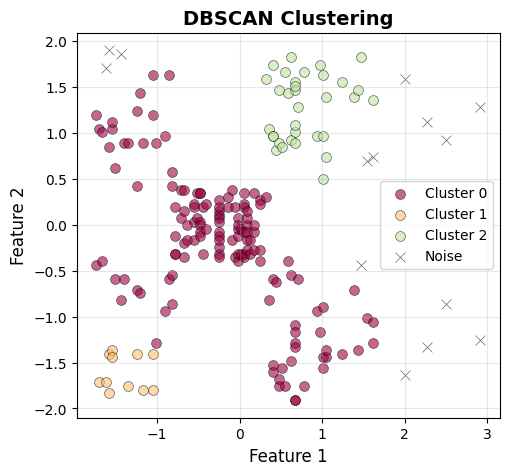

In [8]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
unique_labels = set(clusters)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

for k, col in zip(unique_labels, colors):
    if k == -1:
        col = 'black'
        marker = 'x'
        label = 'Noise'
    else:
        marker = 'o'
        label = f'Cluster {k}'
    
    class_member_mask = (clusters == k)
    xy = x_scaled[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c=[col], marker=marker, 
               s=50, alpha=0.6, label=label, edgecolors='black', linewidths=0.5)

plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.title('DBSCAN Clustering', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

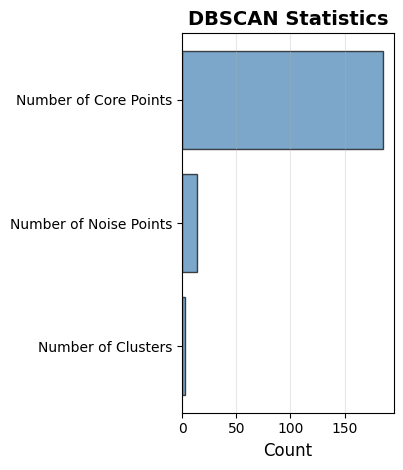

In [9]:
# Cluster statistics
plt.subplot(1, 2, 2)
n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise = (clusters == -1).sum()

stats = {
    'Number of Clusters': n_clusters,
    'Number of Noise Points': n_noise,
    'Number of Core Points': (clusters != -1).sum()
}

plt.barh(list(stats.keys()), list(stats.values()), color='steelblue', alpha=0.7, edgecolor='black')
plt.xlabel('Count', fontsize=12)
plt.title('DBSCAN Statistics', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

In [10]:
print(f"Number of clusters: {n_clusters}")
print(f"Number of noise points: {n_noise}")
print(f"Silhouette Score: {silhouette_score(x_scaled[clusters != -1], clusters[clusters != -1]):.3f}")

Number of clusters: 3
Number of noise points: 14
Silhouette Score: 0.358
